# 1. Problem Research

ome Credit is currently utilizing various statistical methods and Machine Learning techniques to predict credit scores. Now, we invite you to unlock the full potential of our data. By doing so, we aim to ensure that customers capable of repayment are not denied loan applications. Furthermore, we aspire to provide loans with principals, maturities, and repayment calendars that motivate customers towards success. The evaluation will assess the depth of your analytical insights. It's noteworthy that you need to employ at least 2 Machine Learning models, with one of them being Logistic Regression. This initiative is crucial in enhancing our credit assessment process and delivering more personalized loan offerings to our customers, fostering their financial success.


In [1]:
# Import Library Utama
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Data Pre-Processing


In [3]:
df_train.duplicated().sum()

0

In [4]:
# feature names
df_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [5]:
data=df_train[['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH']]


the data frame `df_train` is being subsetted to include only a specific set of features deemed crucial for modeling purposes. The selected features are as follows:

- **TARGET:** The target variable indicating payment difficulties (1 for difficulties, 0 for no difficulties).

- **Demographic Information:**
  - **NAME_CONTRACT_TYPE:** Type of loan contract (Cash loans or Revolving loans).
  - **CODE_GENDER:** Gender of the client.
  - **FLAG_OWN_CAR:** Whether the client owns a car (Y/N).
  - **FLAG_OWN_REALTY:** Whether the client owns real estate (Y/N).
  - **CNT_CHILDREN:** Number of children the client has.

- **Financial Information:**
  - **AMT_INCOME_TOTAL:** Total annual income of the client.
  - **AMT_CREDIT:** Credit amount of the loan.
  - **AMT_ANNUITY:** Loan annuity.
  - **AMT_GOODS_PRICE:** Price of the goods for which the loan is given.

- **Personal and Social Information:**
  - **NAME_TYPE_SUITE:** Who accompanies the client when applying for the loan.
  - **NAME_INCOME_TYPE:** Client's income type (e.g., working, state servant).
  - **NAME_EDUCATION_TYPE:** Client's education level.
  - **NAME_FAMILY_STATUS:** Family status of the client.
  - **NAME_HOUSING_TYPE:** Housing situation of the client.

- **Geographic Information:**
  - **REGION_POPULATION_RELATIVE:** Relative population density of the region where the client lives.

- **Time-Related Information:**
  - **DAYS_BIRTH:** Age of the client in days (negative value).

By selecting this subset of features, the intention is to focus on the most relevant and informative variables for the modeling task, potentially improving model efficiency and interpretability.


In [6]:
print('Cek Missing Values:\n',data.isna().sum())

Cek Missing Values:
 TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
dtype: int64


In [7]:
# remove missing values
data=data.dropna()

In [8]:
columns_to_check = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
                    'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

for column in columns_to_check:
    print(f"{column}: {data[column].unique()}\n")


TARGET: [1 0]

NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']

CODE_GENDER: ['M' 'F' 'XNA']

FLAG_OWN_CAR: ['N' 'Y']

FLAG_OWN_REALTY: ['Y' 'N']

NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']

NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']

NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']



In [9]:
data.CODE_GENDER.value_counts()

CODE_GENDER
F      201635
M      104568
XNA         4
Name: count, dtype: int64

In [10]:
data = data.loc[data['CODE_GENDER'] != 'XNA']
data.CODE_GENDER.value_counts()


CODE_GENDER
F    201635
M    104568
Name: count, dtype: int64

In [11]:
# The variable DAYS_BIRTH may not provide meaningful insights for modeling, thus it will be replaced with the variable AGE,
# which represents the age of the customer in years.
data = data.assign(AGE=(data['DAYS_BIRTH']/-365).astype(int)).drop('DAYS_BIRTH',axis=1)

In [12]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 306203 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      306203 non-null  int64  
 1   NAME_CONTRACT_TYPE          306203 non-null  object 
 2   CODE_GENDER                 306203 non-null  object 
 3   FLAG_OWN_CAR                306203 non-null  object 
 4   FLAG_OWN_REALTY             306203 non-null  object 
 5   CNT_CHILDREN                306203 non-null  int64  
 6   AMT_INCOME_TOTAL            306203 non-null  float64
 7   AMT_CREDIT                  306203 non-null  float64
 8   AMT_ANNUITY                 306203 non-null  float64
 9   AMT_GOODS_PRICE             306203 non-null  float64
 10  NAME_TYPE_SUITE             306203 non-null  object 
 11  NAME_INCOME_TYPE            306203 non-null  object 
 12  NAME_EDUCATION_TYPE         306203 non-null  object 
 13  NAME_FAMILY_STATUS 

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54


## 2. Data Visualization and Business Insight
 

In [13]:
# import library data visualization
import matplotlib.pyplot as plt
import seaborn as sns


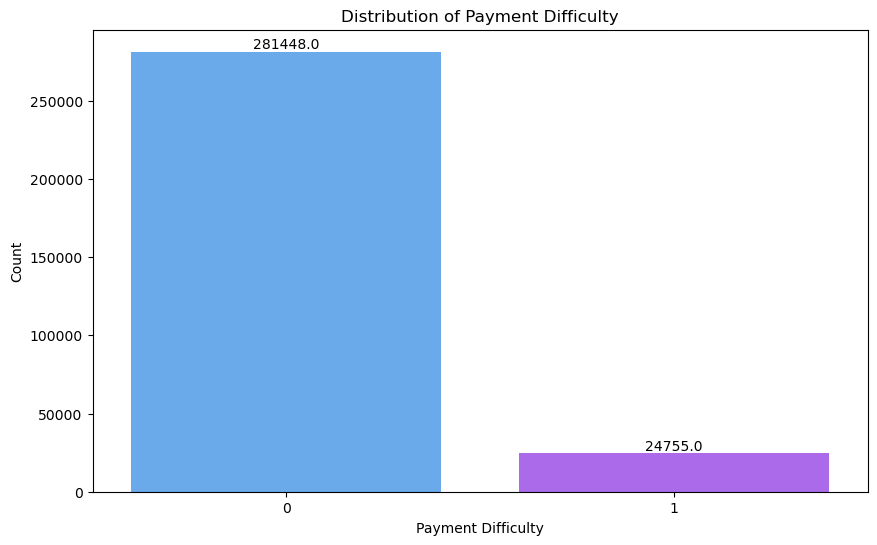

In [14]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='TARGET', data=data, order=data['TARGET'].value_counts(ascending=False).index, palette='cool')
plt.title('Distribution of Payment Difficulty')
plt.xlabel('Payment Difficulty')
plt.ylabel('Count')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 0.5), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

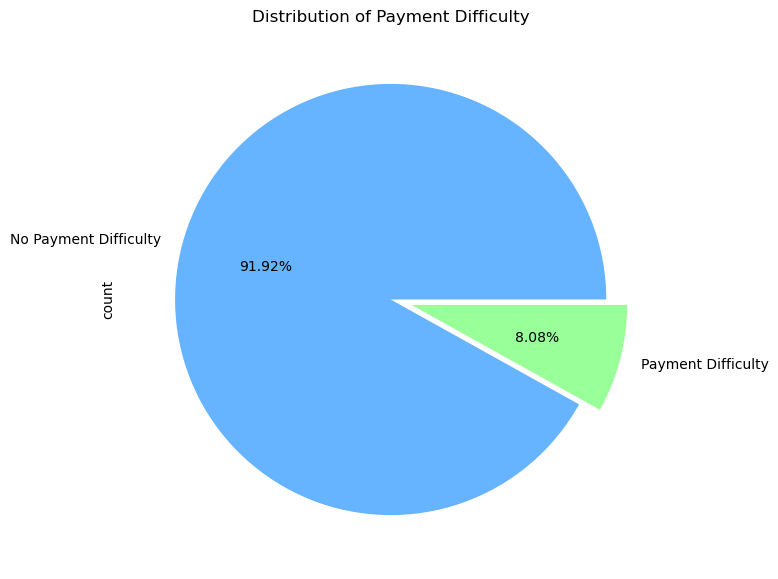

In [15]:
# Pie chart for 'TARGET' distribution
plt.figure(figsize=(7,7))
data['TARGET'].value_counts().plot(kind='pie', autopct='%1.2f%%', explode=[0, 0.1], labels=['No Payment Difficulty', 'Payment Difficulty'], colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Payment Difficulty')
plt.show()


The dataset reveals that the "TARGET" variable, which indicates the payment difficulty status, is imbalanced. The majority (281,448 (91.92%) observations) fall under category 0, representing clients without significant payment difficulties. On the other hand, category 1, indicating clients with payment challenges, comprises 24,755 observations (8.08%). Understanding this class distribution is crucial for modeling and assessing the potential impact on predictive performance.

In [16]:
columns_to_check = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
                    'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
for column in columns_to_check:
    value_counts = pd.DataFrame(data[column].value_counts())
    value_counts.columns = ['Count']
    print(f"Value counts for {column}:\n{value_counts}\n{'='*50}\n")

Value counts for TARGET:
         Count
TARGET        
0       281448
1        24755

Value counts for NAME_CONTRACT_TYPE:
                     Count
NAME_CONTRACT_TYPE        
Cash loans          277213
Revolving loans      28990

Value counts for CODE_GENDER:
              Count
CODE_GENDER        
F            201635
M            104568

Value counts for FLAG_OWN_CAR:
               Count
FLAG_OWN_CAR        
N             202035
Y             104168

Value counts for FLAG_OWN_REALTY:
                  Count
FLAG_OWN_REALTY        
Y                212839
N                 93364

Value counts for NAME_TYPE_SUITE:
                  Count
NAME_TYPE_SUITE        
Unaccompanied    248512
Family            40147
Spouse, partner   11370
Children           3267
Other_B            1770
Other_A             866
Group of people     271

Value counts for NAME_INCOME_TYPE:
                       Count
NAME_INCOME_TYPE            
Working               158123
Commercial associate   71253
Pensione

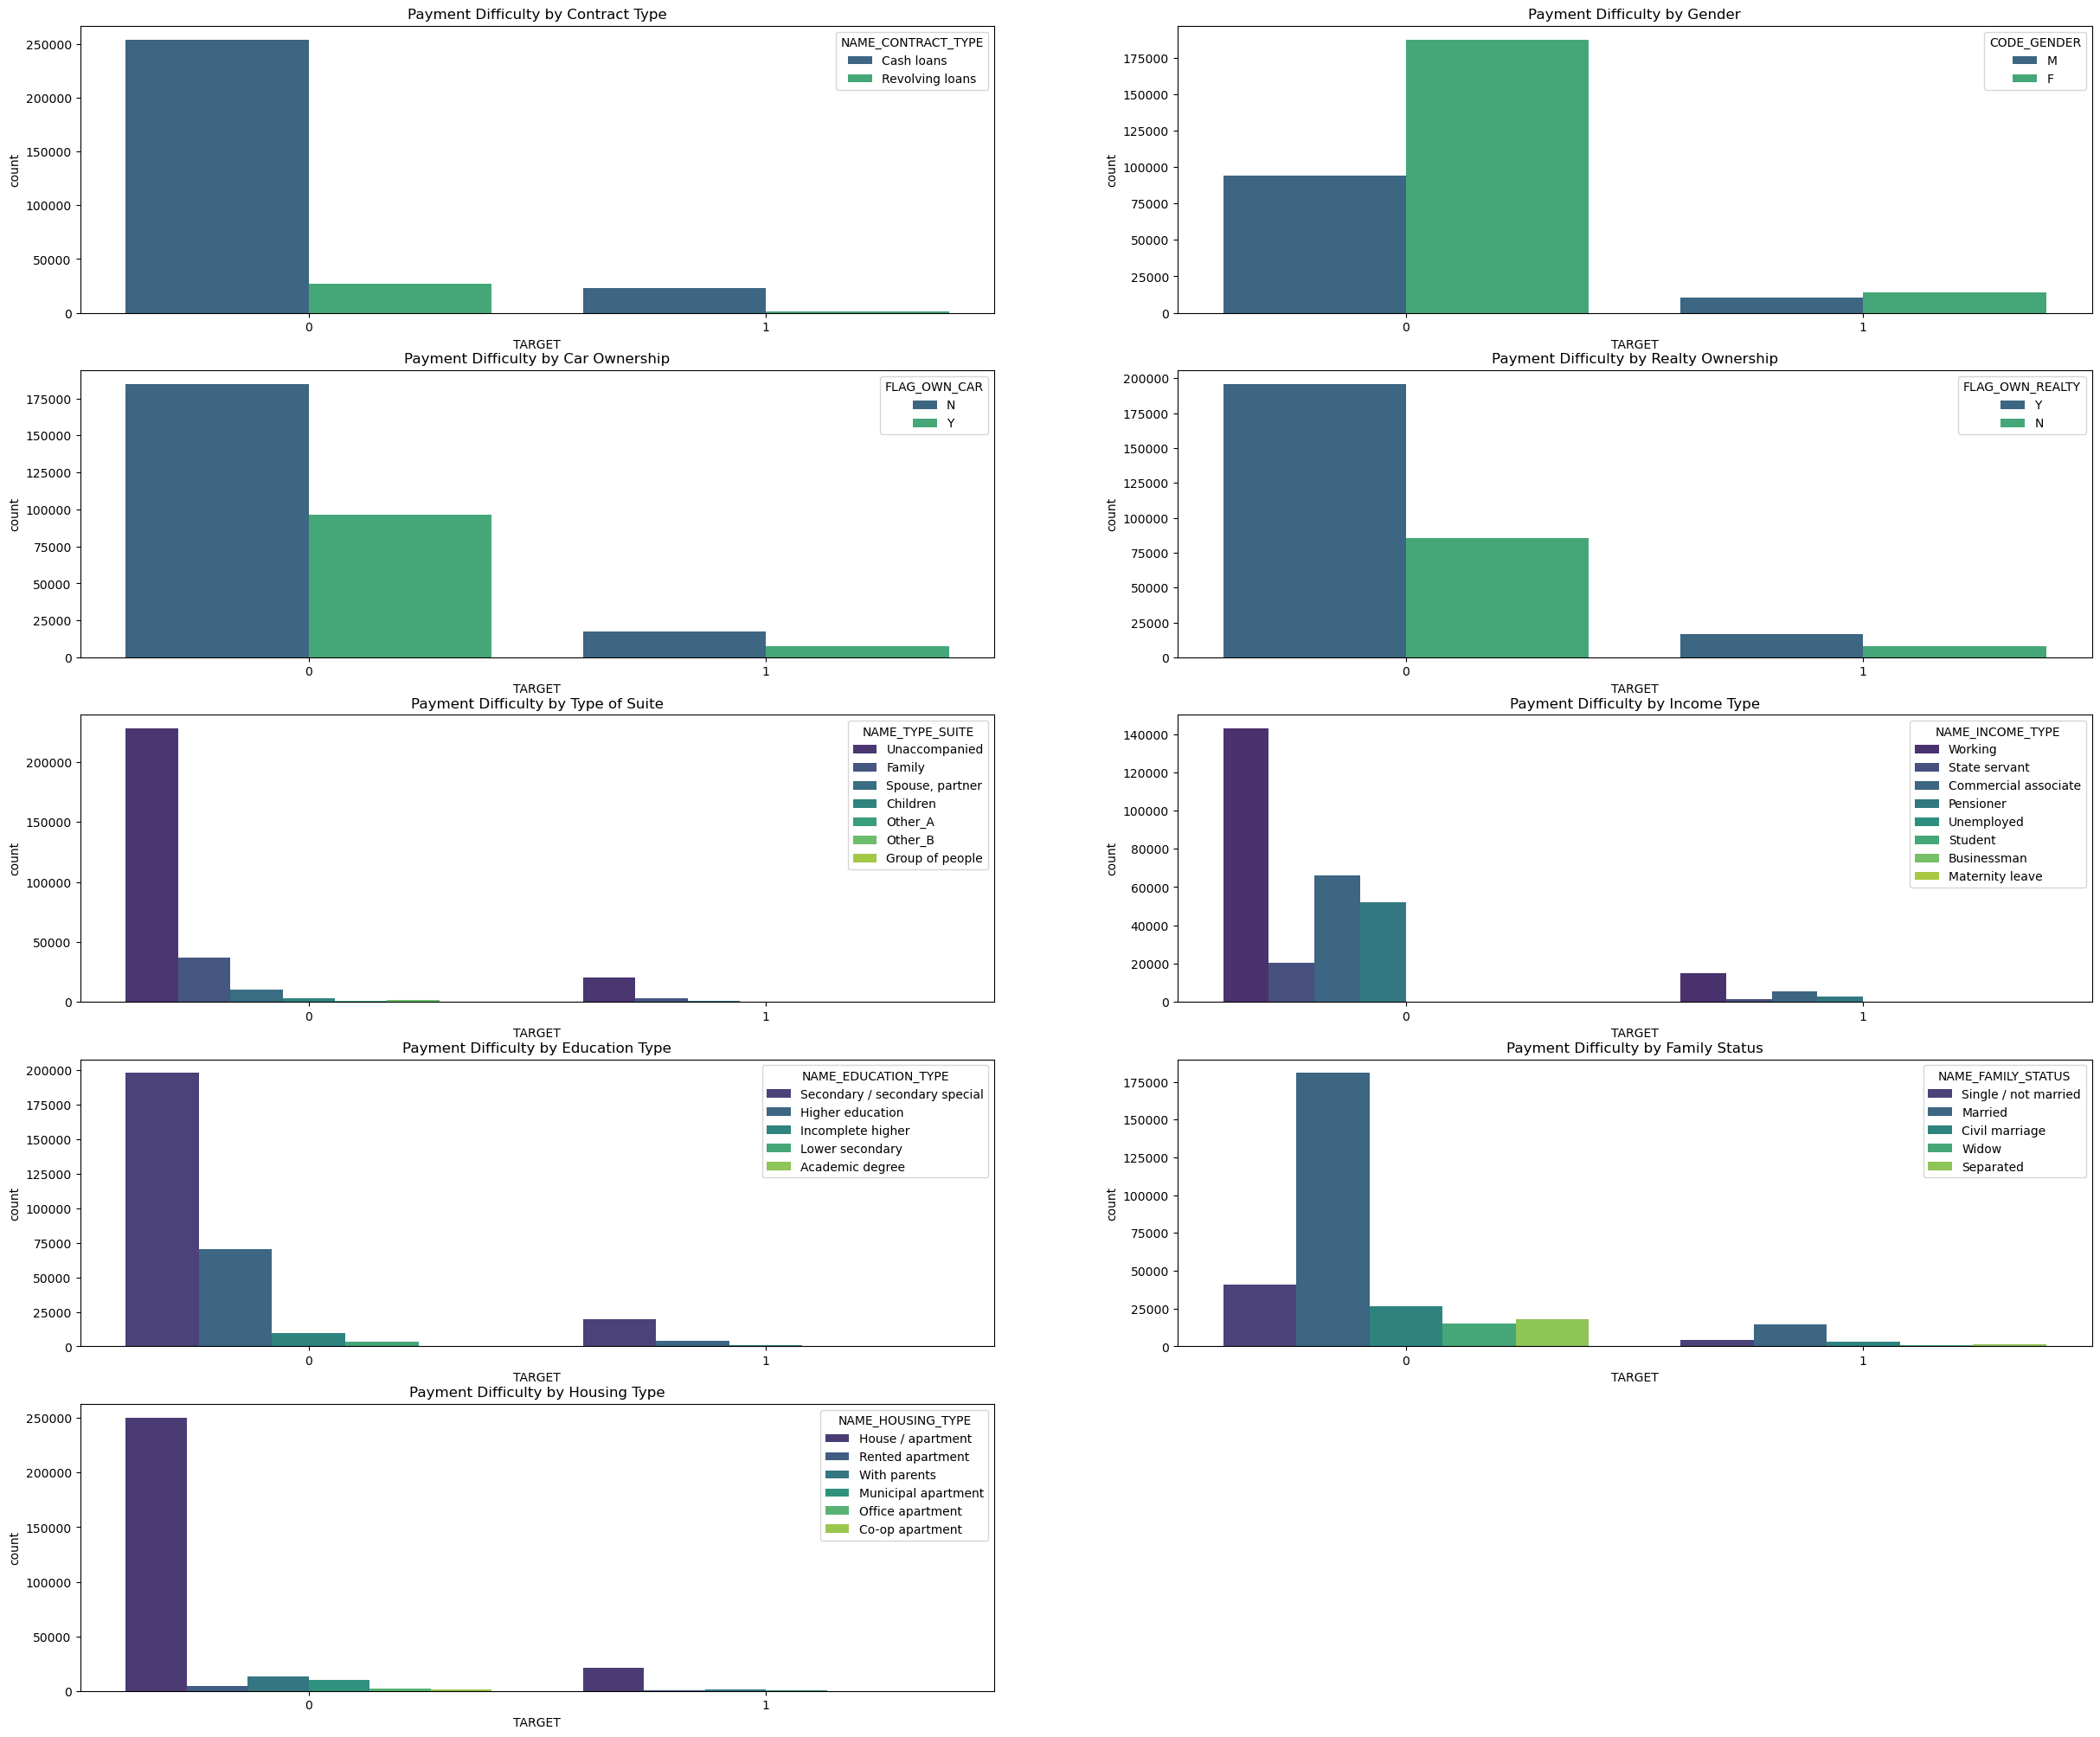

In [17]:
# Countplot of TARGET based on various categories
plt.figure(figsize=(30, 25))

# Plot 1: NAME_CONTRACT_TYPE
plt.subplot(5, 2, 1)
sns.countplot(x=data.TARGET, hue=data.NAME_CONTRACT_TYPE, palette='viridis')
plt.title('Payment Difficulty by Contract Type')

# Plot 2: CODE_GENDER
plt.subplot(5, 2, 2)
sns.countplot(x=data.TARGET, hue=data.CODE_GENDER, palette='viridis')
plt.title('Payment Difficulty by Gender')

# Plot 3: FLAG_OWN_CAR
plt.subplot(5, 2, 3)
sns.countplot(x=data.TARGET, hue=data.FLAG_OWN_CAR, palette='viridis')
plt.title('Payment Difficulty by Car Ownership')

# Plot 4: FLAG_OWN_REALTY
plt.subplot(5, 2, 4)
sns.countplot(x=data.TARGET, hue=data.FLAG_OWN_REALTY, palette='viridis')
plt.title('Payment Difficulty by Realty Ownership')

# Plot 5: NAME_TYPE_SUITE
plt.subplot(5, 2, 5)
sns.countplot(x=data.TARGET, hue=data.NAME_TYPE_SUITE, palette='viridis')
plt.title('Payment Difficulty by Type of Suite')

# Plot 6: NAME_INCOME_TYPE
plt.subplot(5, 2, 6)
sns.countplot(x=data.TARGET, hue=data.NAME_INCOME_TYPE, palette='viridis')
plt.title('Payment Difficulty by Income Type')

# Plot 7: NAME_EDUCATION_TYPE
plt.subplot(5, 2, 7)
sns.countplot(x=data.TARGET, hue=data.NAME_EDUCATION_TYPE, palette='viridis')
plt.title('Payment Difficulty by Education Type')

# Plot 8: NAME_FAMILY_STATUS
plt.subplot(5, 2, 8)
sns.countplot(x=data.TARGET, hue=data.NAME_FAMILY_STATUS, palette='viridis')
plt.title('Payment Difficulty by Family Status')

# Plot 9: NAME_HOUSING_TYPE
plt.subplot(5, 2, 9)
sns.countplot(x=data.TARGET, hue=data.NAME_HOUSING_TYPE, palette='viridis')
plt.title('Payment Difficulty by Housing Type')

plt.show()


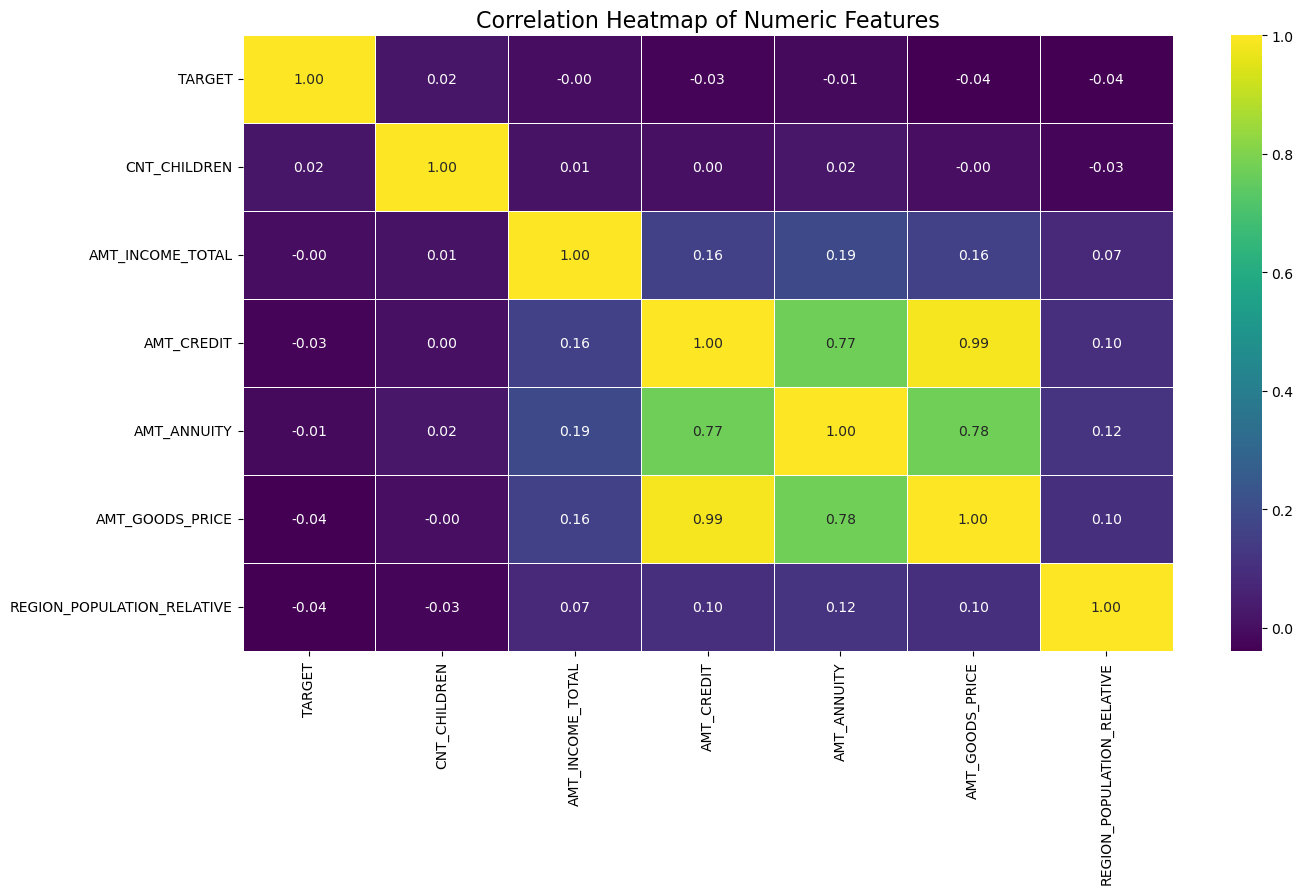

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
TARGET,1.000000,0.019273,-0.003920,-0.030312,-0.012815,-0.039584,-0.037244
CNT_CHILDREN,0.019273,1.000000,0.012896,0.002094,0.021485,-0.002021,-0.025634
AMT_INCOME_TOTAL,-0.003920,0.012896,1.000000,0.156150,0.191061,0.159047,0.074502
AMT_CREDIT,-0.030312,0.002094,0.156150,1.000000,0.769937,0.986978,0.099487
AMT_ANNUITY,-0.012815,0.021485,0.191061,0.769937,1.000000,0.775089,0.118180
AMT_GOODS_PRICE,-0.039584,-0.002021,0.159047,0.986978,0.775089,1.000000,0.103405
REGION_POPULATION_RELATIVE,-0.037244,-0.025634,0.074502,0.099487,0.118180,0.103405,1.000000


In [18]:
# Create a visually appealing heatmap of numeric correlations
plt.figure(figsize=(15, 8))

# Selecting only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_data.corr(), cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()

# Display the numeric correlations
correlation_matrix = numeric_data.corr()
correlation_matrix

### Correlation Analysis

#### 1. Target and Number of Children (CNT_CHILDREN)
   - The correlation coefficient between 'TARGET' and 'CNT_CHILDREN' is small (0.019), suggesting a weak positive correlation.
   - The presence of children shows a minor correlation with payment difficulties, indicating that having more children may slightly increase the likelihood of payment difficulties.

#### 2. Target and Income (AMT_INCOME_TOTAL)
   - The correlation coefficient between 'TARGET' and 'AMT_INCOME_TOTAL' is very small (-0.004), indicating a very weak negative correlation.
   - Income has a minimal impact on the likelihood of payment difficulties. The correlation is almost negligible.

#### 3. Target and Credit Amount (AMT_CREDIT)
   - A negative correlation of -0.030 suggests a weak negative relationship between 'TARGET' and 'AMT_CREDIT'.
   - Clients with lower credit amounts may have a slightly higher likelihood of payment difficulties, but the correlation is not strong.

#### 4. Target and Loan Annuity (AMT_ANNUITY)
   - The correlation coefficient between 'TARGET' and 'AMT_ANNUITY' is -0.013, indicating a weak negative correlation.
   - Loan annuity has a minimal impact on the likelihood of payment difficulties.

#### 5. Target and Goods Price (AMT_GOODS_PRICE)
   - The correlation coefficient is -0.040, suggesting a weak negative correlation between 'TARGET' and 'AMT_GOODS_PRICE'.
   - Clients with lower goods prices are slightly associated with a higher likelihood of payment difficulties.

#### 6. Target and Region Population Relative (REGION_POPULATION_RELATIVE)
   - A correlation of -0.037 indicates a weak negative relationship between 'TARGET' and 'REGION_POPULATION_RELATIVE'.
   - Clients from regions with lower population density may have a slightly higher likelihood of payment difficulties.

In summary, while some weak correlations are observed, none of them exhibit a strong relationship with the target variable. It's important to note that other factors not considered in this analysis may have a more significant impact on predicting payment difficulties. Further feature engineering and analysis are recommended for a comprehensive understanding of the factors influencing the target variable.


## 4. Machine Learning Implementation and Evaluation

In [19]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = data.drop('TARGET', axis=1)
y = data['TARGET']

# Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (244962, 16)
Shape of X_test: (61241, 16)
Shape of y_train: (244962,)
Shape of y_test: (61241,)


In the classification stage, two distinct methods are employed:

1. Logistic Regression
2. Decision Trees

To fine-tune the model's performance, we will utilize the Random Search Cross-Validation for hyperparameter tuning. This process involves systematically exploring a range of hyperparameter combinations to discover the optimal configuration for each model. Through Random Search CV, we aim to enhance the predictive power and overall effectiveness of both Logistic Regression and Decision Trees models.

### LOGISTIC REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define categorical features
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                         'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                         'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Define numeric features
numeric_features = [col for col in X_train.columns if col not in categorical_features]

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Step 1: Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Step 2: Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Step 3: Transform the testing data
X_test_encoded = preprocessor.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42, solver='lbfgs')  # Specify the solver

# Step 4: Create the GridSearchCV object
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')

# Step 5: Train the model using GridSearchCV
grid_search.fit(X_train_encoded, y_train)

# Step 6: Get the best Logistic Regression model
best_logreg_model = grid_search.best_estimator_

# Step 7: Make predictions on the testing data
y_pred = best_logreg_model.predict(X_test_encoded)

# Step 8: Evaluate the performance of the model
print("Best Hyperparameters:", grid_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}

Accuracy: 0.9179471269247726

Confusion Matrix:
 [[56216     0]
 [ 5025     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56216
           1       1.00      0.00      0.00      5025

    accuracy                           0.92     61241
   macro avg       0.96      0.50      0.48     61241
weighted avg       0.92      0.92      0.88     61241



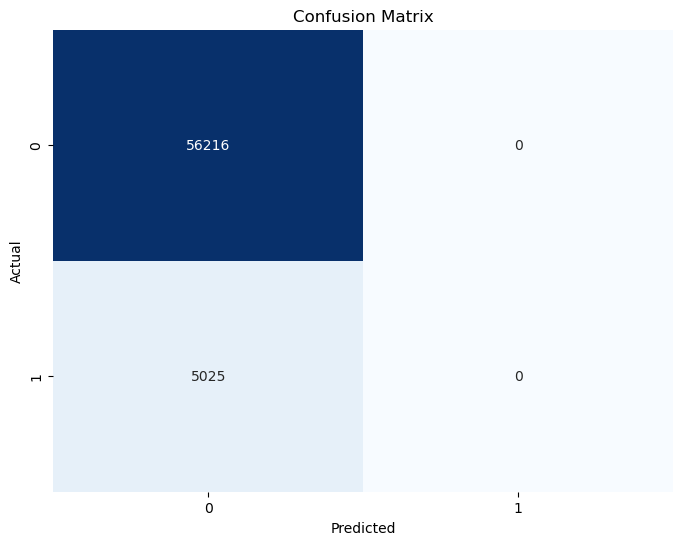

In [21]:
# Step 9: Visualize the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The logistic regression model, tuned with hyperparameters C=0.001 and penalty L2, exhibits an overall accuracy of 91.8%. However, a closer look at the confusion matrix reveals a challenge in correctly classifying instances of the positive class (TARGET = 1), as the model fails to identify any true positives (TP) and reports a low recall and F1-score for this class. This indicates a significant imbalance and a need for further investigation and potential model adjustments to enhance performance on positive instances.

### DECISION TREE

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('TARGET', axis=1), data['TARGET'], test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree 
dt_model = DecisionTreeClassifier(random_state=42)

# Train model Decision Tree
dt_model.fit(X_train_encoded, y_train)

# prediction
y_dt_pred = dt_model.predict(X_test_encoded)

# Evaluation model
print("\nAccuracy:", accuracy_score(y_test, y_dt_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_dt_pred))
print("\nClassification Report:\n", classification_report(y_test, y_dt_pred, zero_division=1))



Accuracy: 0.8411358403683806

Confusion Matrix:
 [[50825  5391]
 [ 4338   687]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     56216
           1       0.11      0.14      0.12      5025

    accuracy                           0.84     61241
   macro avg       0.52      0.52      0.52     61241
weighted avg       0.86      0.84      0.85     61241



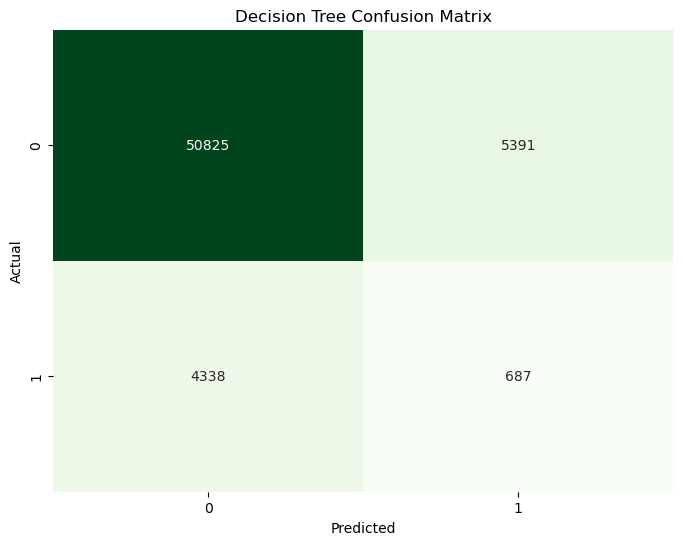

In [23]:
# Visualisasi Confusion Matrix untuk Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_dt_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The logistic regression model achieved an accuracy of around 84.11%, signifying a generally correct prediction rate. However, a closer look at the confusion matrix reveals a challenge in correctly classifying the positive instances, with 687 true positives, 5391 false positives, and 4338 false negatives. The classification report reinforces this observation, indicating a precision-recall imbalance for the positive class. The model's precision, recall, and F1-score for class 1 are notably lower, suggesting a need for fine-tuning or alternative approaches to address false positives and enhance the overall predictive performance for instances of payment difficulty.

# 5. Business Recommendation

### Overview


### 1. **Loan Portfolio Strategy**

The dataset indicates a significant preference for "Cash loans" over "Revolving loans." To optimize the loan portfolio, Home Credit Indonesia should focus on refining and customizing products and services for customers with cash loans.

### 2. **Understanding the Target Market**

Gender plays a crucial role in the dataset, with a notable difference between male (M) and female (F) clients. Tailoring marketing strategies and product offerings to each gender can tap into a broader customer base and enhance market reach.

### 3. **Impact of Asset Ownership**

A substantial number of customers do not own a car (N) compared to those with car ownership (Y). To address diverse financial needs, Home Credit Indonesia should design specific products or services for each group.

### 4. **Influence of Real Estate Ownership**

A significant portion of customers owns realty (Y). Crafting strategies that align with the preferences and behaviors of real estate owners can unlock opportunities for targeted financial solutions.

### 5. **Understanding Customer Types**

The majority of clients fall under the "Unaccompanied" category. This insight suggests a need to tailor marketing and engagement strategies for this segment, along with exploring ways to enhance services for clients in other categories.

### 6. **Diverse Income Channels**

With various income types represented, "Working" stands out as the most common. Home Credit Indonesia can create financial products that align with different income patterns and employment statuses to cater to a diverse customer base.

### 7. **Education-Based Approach**

Educational backgrounds vary among clients, with a significant portion having "Secondary / secondary special" education. Initiating educational campaigns or designing financial products aligned with different educational levels can enhance customer engagement.

### 8. **Family Status Considerations**

The dataset reveals that "Married" individuals constitute the largest family status group. Designing family-centric financial solutions can address the unique needs of married clients and foster long-term relationships.

### 9. **Diverse Housing Preferences**

"House / apartment" is the most common housing type. Tailoring products or services to complement the varied housing preferences of clients can further enhance customer satisfaction.



These business recommendations aim to guide Home Credit Indonesia in strategically tailoring its offerings to specific customer segments, fostering a more personalized and effective approach to financial services.
